<a href="https://colab.research.google.com/github/otoperalias/Coyuntura/blob/main/clases/Tema2_Visualizacion_asdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualización de datos: Creando gráficos de calidad

En este notebook vamos a aprender a crear gráficos de calidad. Para ello, vamos a usar datos de PIB en volumen y paro de los países de la UE, procedentes de [EUROSTAT](https://ec.europa.eu/eurostat/web/main/data/database).

*Daniel Oto-Peralías*

### 1. Importamos las librerías necesarias

In [1]:
# IMPORTAMOS LIBRERIAS
import pandas as pd
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 30)
import matplotlib.pyplot as plt

### 2. Importamos los datos

* Vamos a importar datos trimestrales de PIB en volumen (tasas de variación interanuales) y de tasa de paro para los países de la UE, ambos ajustados por estacionalidad y calendario.  
* En [este otro notebook](https://github.com/otoperalias/Coyuntura/blob/main/clases/Tema2_VI.ipynb) se realiza la importación y procesamiento de dichos datos. Es muy recomendable que miréis el notebook e intentéis entender todo lo que se hace, replicándolo.
* Los códigos de países de EUROSTAT están disponibles [aquí](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Country_codes).

In [2]:
# PIB en volúmen
pib = pd.read_csv("https://raw.githubusercontent.com/otoperalias/Coyuntura/main/clases/datos/pib_volumen_EUROSTAT.csv", index_col=0, parse_dates=True)
pib

,AT,BE,BG,CH,CY,CZ,DE,DK,EA,EA19,EA20,EE,EL,ES,EU27_2020,...,LT,LU,LV,MK,MT,NL,NO,PL,PT,RO,RS,SE,SI,SK,TR
2021-07-01,4.8,5.7,8.1,5.7,12.5,4.0,2.6,7.4,5.0,5.0,5.0,7.0,11.9,5.4,5.2,...,5.5,4.1,7.3,2.4,19.3,7.3,6.0,7.2,5.3,7.1,8.1,5.9,5.8,2.9,9.1
2021-10-01,6.7,6.9,7.8,5.7,9.3,3.9,2.1,10.3,5.5,5.5,5.5,6.3,9.2,6.7,5.8,...,6.5,7.8,6.2,1.3,14.8,7.0,5.0,9.3,6.9,2.7,7.7,6.1,9.5,2.7,9.3
2022-01-01,8.9,5.1,5.6,5.4,6.6,4.8,3.4,6.5,5.4,5.4,5.4,3.7,7.7,6.9,5.5,...,5.0,3.7,6.6,1.9,7.9,7.1,3.6,10.6,12.1,5.0,4.3,2.2,4.9,3.5,7.3
2022-04-01,6.7,3.8,5.0,3.9,6.3,3.6,0.8,2.4,3.9,3.9,3.9,-0.6,6.8,7.3,4.0,...,2.8,2.1,4.1,3.3,5.1,5.8,4.5,6.7,7.4,4.0,4.0,2.5,4.2,1.7,7.0
2022-07-01,2.0,1.9,3.7,1.8,4.2,2.1,1.4,0.6,2.5,2.5,2.6,-0.5,4.0,6.1,2.6,...,1.8,2.1,0.5,1.9,2.0,3.8,2.3,5.1,4.8,3.2,1.3,2.2,1.6,1.3,3.8
2022-10-01,2.2,1.4,2.7,1.5,3.3,1.0,0.2,-2.9,1.7,1.7,1.7,-2.7,4.3,4.6,1.5,...,0.2,-2.1,1.3,1.7,3.1,3.5,1.6,1.5,3.4,4.4,0.8,-0.6,0.8,1.1,3.4
2023-01-01,1.7,1.6,2.4,1.6,2.8,0.3,0.2,1.4,1.3,1.3,1.3,-4.3,2.0,3.9,1.2,...,-2.1,-1.4,0.2,NaN,5.4,2.4,2.6,-1.0,2.5,1.0,0.9,0.9,1.3,0.8,3.0
2023-04-01,-1.5,1.3,2.0,0.4,2.4,0.2,0.1,1.5,0.5,0.5,0.5,-2.8,2.6,2.4,0.5,...,0.8,-0.5,-0.2,NaN,10.1,-0.5,0.9,-0.7,2.6,2.9,1.5,-0.6,1.8,1.6,5.2
2023-07-01,-1.7,1.3,1.8,0.4,2.4,-0.4,-0.3,2.2,0.0,0.0,0.0,-2.9,2.1,2.2,0.1,...,0.1,-1.9,0.2,NaN,8.7,-0.9,-1.6,0.2,1.9,3.5,3.7,-0.5,1.9,1.8,5.0
2023-10-01,-1.3,1.3,1.7,0.6,2.2,0.0,-0.2,4.9,0.2,0.2,0.2,-2.4,1.3,2.3,0.4,...,0.1,-0.6,-0.2,NaN,7.0,-0.6,1.0,1.9,2.1,1.1,4.0,-0.1,2.4,2.1,4.8


In [3]:
# Tasa de paro
tp = pd.read_csv("https://raw.githubusercontent.com/otoperalias/Coyuntura/main/clases/datos/Tasa_paro_EUROSTAT.csv", index_col=0, parse_dates=True)
tp

,AT,BA,BE,BG,CH,CY,CZ,DE,DK,EA20,EE,EL,ES,EU27_2020,FI,...,LU,LV,ME,MK,MT,NL,NO,PL,PT,RO,RS,SE,SI,SK,TR
2003-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.9,NaN,NaN,NaN
2005-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN


In [4]:
# Filtramos por fecha, con fecha inicio igual a tabla del PIB
tp=tp.loc["2021-07":]

### 3. Gráficos exploratorios: dibujamos directamente desde **pandas**

* Importante: esto solo vale como gráficos exploratorios para uso personal.
* Para otros propósitos, hay que preparar gráficos de más calidad.

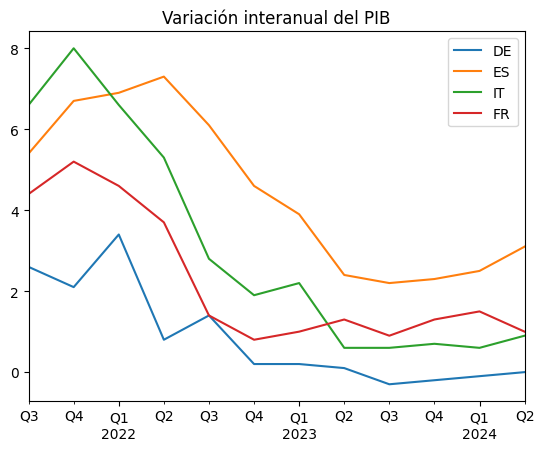

In [5]:
# Tasa de variación del PIB para una selección de países
paises=['DE','ES','IT','FR']
pib[paises].plot(title="Variación interanual del PIB")
plt.show()

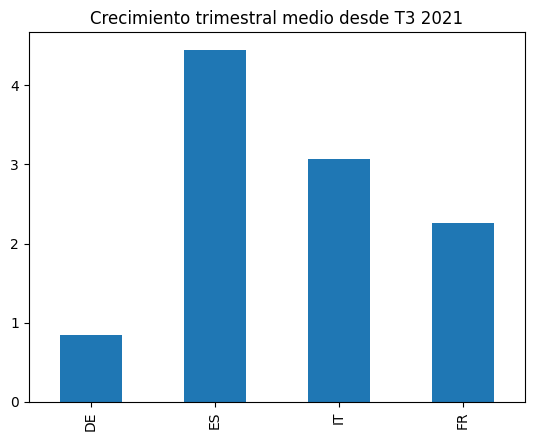

In [6]:
# Grafico de barras para media del periodo
pib_med=pib.mean()
pib_med[paises].plot(kind="bar",title="Crecimiento trimestral medio desde T3 2021")
plt.show()

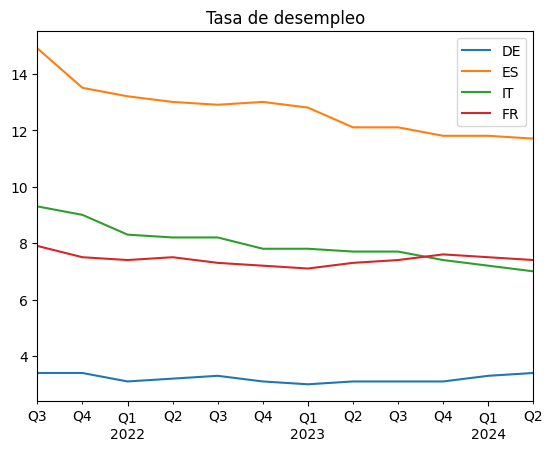

In [7]:
# Tasa de desempleo
tp[paises].plot(title="Tasa de desempleo")
plt.show()

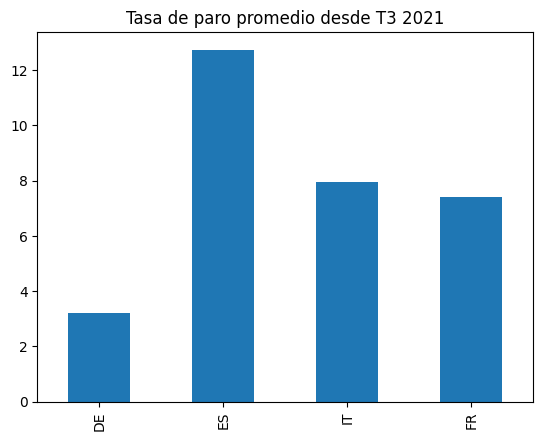

In [8]:
# Grafico de barras para media del periodo
tp_med=tp.mean()
tp_med[paises].plot(kind="bar",title="Tasa de paro promedio desde T3 2021")
plt.show()

### 4. Gráficos de calidad (para informes, trabajos, artículos, etc.)

Matplotlib permite usar diferentes estilos predeterminados:
https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

Echamos un vistazo y elegimos uno que nos guste.


In [9]:
plt.style.use('seaborn-v0_8')

#### Figura 1: Un gráfico, una serie.

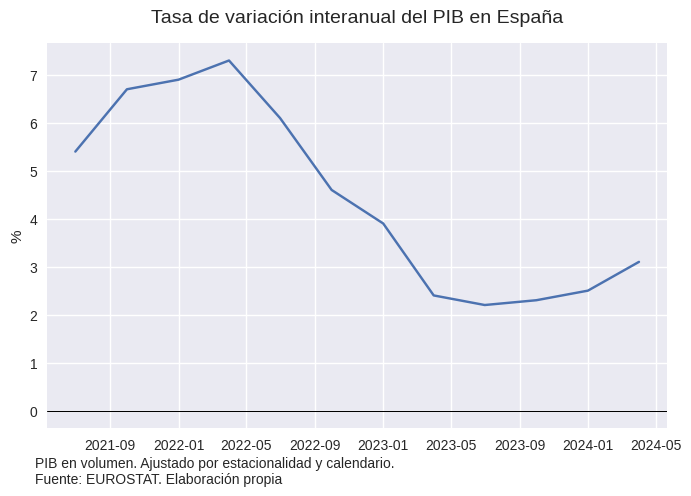

In [10]:
fig, ax=plt.subplots(figsize=(8,5),dpi=100)  # Se genera la figura y los axes (gráficos)
ax.plot(pib['ES']) # Equivalente: pib['ES'].plot(ax=ax)
ax.set_ylabel("%") # Nombre del eje y
ax.set_xlabel("") # Nombre del eje x
ax.axhline(y=0, linewidth=0.75, color="black") # Añado una línea horizonal para resaltar el valor de 0.
ax.set_title("Tasa de variación interanual del PIB en España", size=14, pad=15) # Título del gráfico
fig.text(0.11,0,"PIB en volumen. Ajustado por estacionalidad y calendario.\nFuente: EUROSTAT. Elaboración propia", ha="left",fontsize=10 ) # Nota al pie. El argumento ha=horizontalalignment.
plt.show()

#### Figura 2: Un gráfico, varias series.

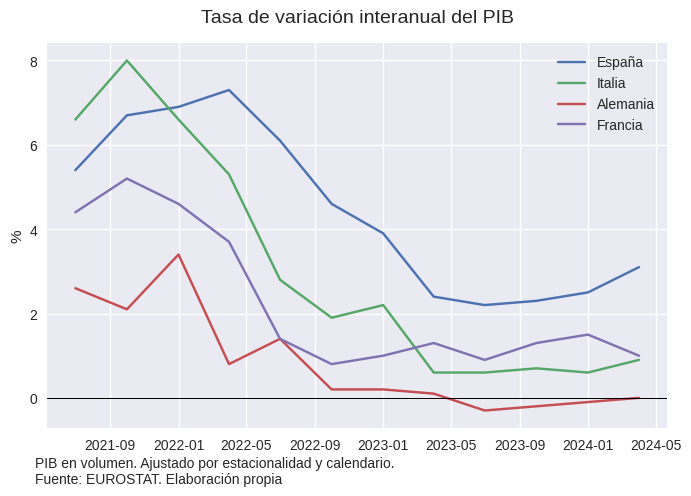

In [11]:
fig, ax=plt.subplots(figsize=(8,5),dpi=100)
ax.plot(pib['ES'],label="España") # Los países se introducen uno a uno, indicando la etiqueta que queremos que aparezca en la leyenda.
ax.plot(pib['IT'],label="Italia")
ax.plot(pib['DE'],label="Alemania")
ax.plot(pib['FR'],label="Francia")
ax.set_ylabel("%")
ax.set_xlabel("")
ax.axhline(y=0, linewidth=0.75, color="black")
ax.set_title("Tasa de variación interanual del PIB", size=14, pad=15)
ax.legend()
fig.text(0.11,0,"PIB en volumen. Ajustado por estacionalidad y calendario.\nFuente: EUROSTAT. Elaboración propia", ha="left",fontsize=10 ) # ha=horizontalalignment
plt.show()

#### Figura 3: Gráfico de barras.

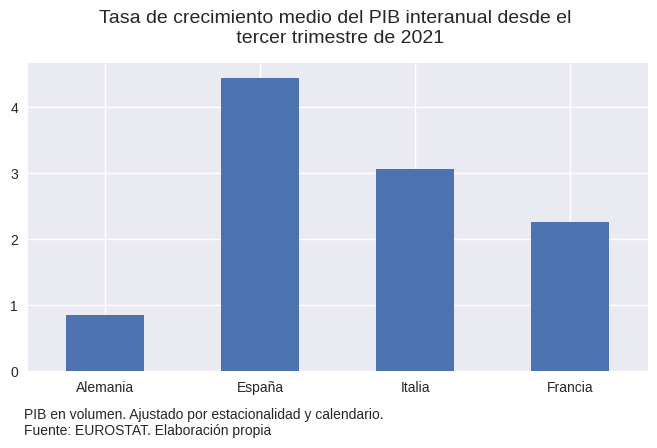

In [12]:
fig,ax=plt.subplots(figsize=(8,4),dpi=100)
pib_med[paises].plot.bar(xlabel="", ax=ax) # Indicamos que queremos un gráfico de barras.
ax.set_xticks([0,1,2,3]) # Indicamos la numeración (valores) de los ticks del eje x. Este es un paso previo para indicar sus respectivas etiquetas (labels)
ax.set_xticklabels(["Alemania", "España","Italia","Francia"], rotation='horizontal') # Se indican las etiquetas de cada barra del gráfico, siguiendo el orden anterior.
ax.set_title("Tasa de crecimiento medio del PIB interanual desde el \n tercer trimestre de 2021", size=14, pad=15)
fig.text(0.12,-0.05,"PIB en volumen. Ajustado por estacionalidad y calendario.\nFuente: EUROSTAT. Elaboración propia", ha="left",fontsize=10 ) # ha=horizontalalignment
plt.show()

#### Figura 4: Figura de dos gráficos.

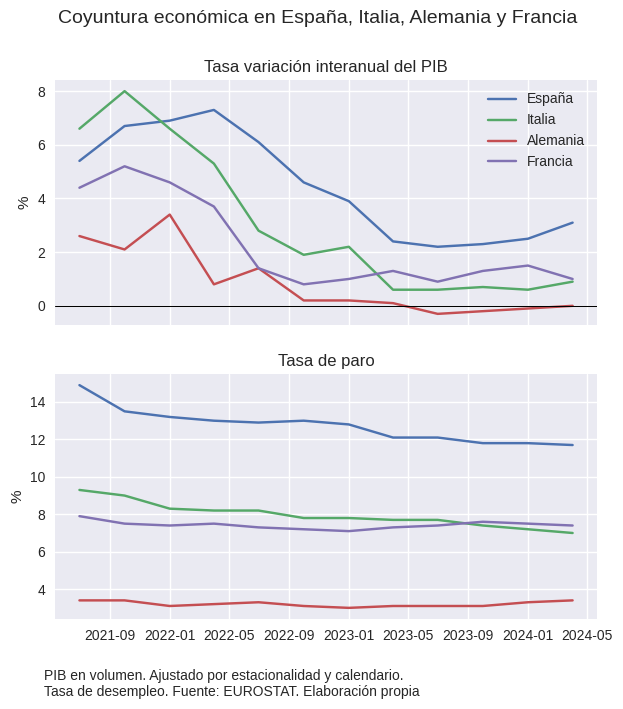

In [13]:
fig, (ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(7,7),dpi=100)
# Axes ax1
ax1.plot(pib['ES'],label="España")
ax1.plot(pib['IT'],label="Italia")
ax1.plot(pib['DE'],label="Alemania")
ax1.plot(pib['FR'],label="Francia")
ax1.set_ylabel("%")
ax1.axhline(y=0, linewidth=0.75, color="black")
ax1.set_title("Tasa variación interanual del PIB")
ax1.legend()
# Axes ax2
ax2.plot(tp['ES'],label="España")
ax2.plot(tp['IT'],label="Italia")
ax2.plot(tp['DE'],label="Alemania")
ax2.plot(tp['FR'],label="Francia")
ax2.set_ylabel("%")
ax2.set_title("Tasa de paro")
ax2.set_xlabel("")
# Toda la figura
fig.suptitle("Coyuntura económica en España, Italia, Alemania y Francia", size=14)
fig.text(0.11,0,"PIB en volumen. Ajustado por estacionalidad y calendario.\nTasa de desempleo. Fuente: EUROSTAT. Elaboración propia", ha="left",fontsize=10 ) # ha=horizontalalignment
plt.show()

### 5. Manipulando las etiquetas del eje x

Por defecto, las etiquetas del eje x suelen salir bien al crear gráficos, pero en otras ocasiones no, como en el siguiente gráfico

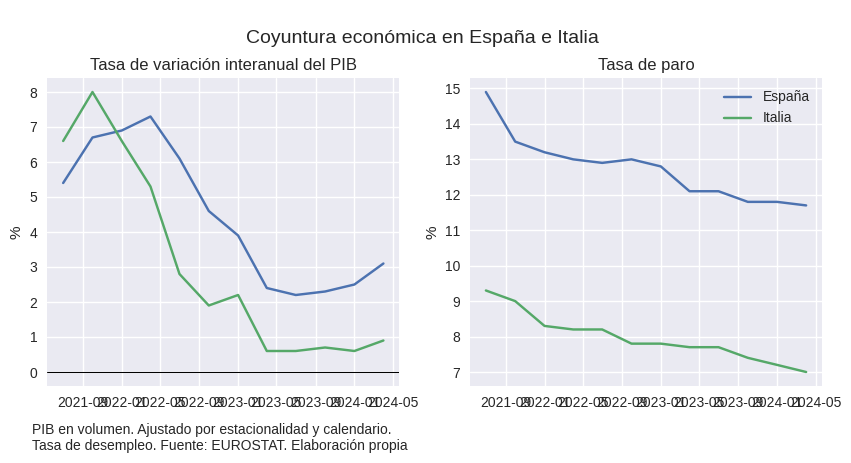

In [14]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,4),dpi=100)
# Axes ax1
ax1.plot(pib['ES'],label="España")
ax1.plot(pib['IT'],label="Italia")
ax1.set_ylabel("%")
ax1.axhline(y=0, linewidth=0.75, color="black")
ax1.set_title("Tasa de variación interanual del PIB")
# Axes ax2
ax2.plot(tp['ES'],label="España")
ax2.plot(tp['IT'],label="Italia")
ax2.set_ylabel("%")
ax2.set_title("Tasa de paro")
ax2.set_xlabel("")
ax2.legend()
# Toda la figura
fig.suptitle("\nCoyuntura económica en España e Italia\n", size=14, y=1.05)  # el argumento "y" es la coordenada y donde debe aparecer el titulo.
fig.text(0.11,-0.05,"PIB en volumen. Ajustado por estacionalidad y calendario.\nTasa de desempleo. Fuente: EUROSTAT. Elaboración propia", ha="left",fontsize=10 ) # ha=horizontalalignment
plt.show()

**Hay varias maneras de solucionar esto. Tres posibilidades son las siguientes:**   
1. Rotando las etiquetas. Esto por sí solo puede ser suficiente, o puede usarse en combinación con las dos opciones siguientes. Por ejemplo:  
```
ax1.set_xticklabels(pib.index.strftime('%Y-%m'), rotation=45)
```
2. Estableciendo la frecuencia en la que deben aparecer las etiquetas y su formato. Por ejemplo:
```
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,6)))
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))
```
3. Manualmente: creando una columna específica que se ajuste a nuestras necesidades y usando dicha columna como etiquetas. Por ej.:
```
# Primero se crea la columna
pib["años"]=pib.index.astype(str).str[2:4]
pib["meses"]=pib.index.astype(str).str[5:7]
pib["ejex_etiq"]=""
pib.loc[(pib['meses']=="01"), "ejex_etiq"]="1ºTr. "+pib["años"]
pib.loc[(pib['meses']=="07"), "ejex_etiq"]="3ºTr. "+pib["años"]
```
```
#Y luego se añade estas dos líneas en el código de la figura:
ax1.set_xticks(pib.index)
ax1.set_xticklabels(pib["ejex_etiq"])
```

Vamos a ver la implementación de estos ejemplos.

<ipython-input-15-1ff125232140>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(pib.index.strftime('%Y-%m'), rotation=45) # rotamos las etiquetas
<ipython-input-15-1ff125232140>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(tp.index.strftime('%Y-%m'), rotation=45) # rotamos las etiquetas


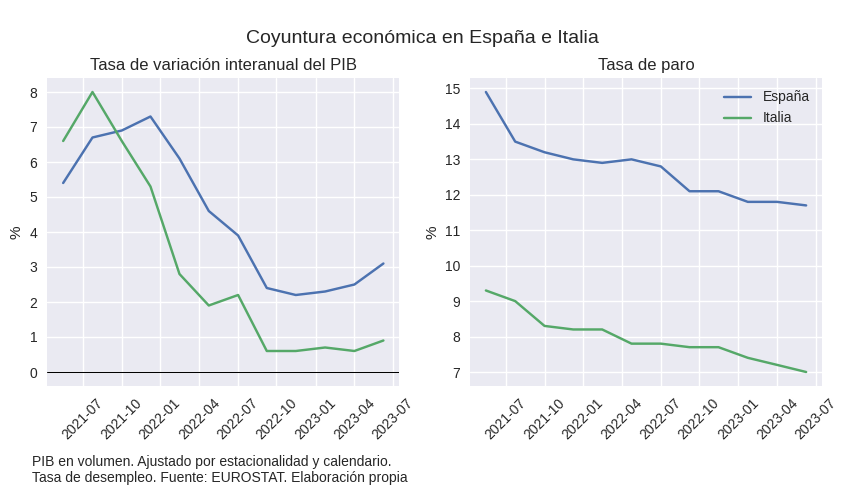

In [15]:
# Alternativa 1: rotamos las etiquetas

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,4),dpi=100)
# Axes ax1
ax1.plot(pib['ES'],label="España")
ax1.plot(pib['IT'],label="Italia")
ax1.set_ylabel("%")
ax1.axhline(y=0, linewidth=0.75, color="black")
ax1.set_title("Tasa de variación interanual del PIB")
ax1.set_xticklabels(pib.index.strftime('%Y-%m'), rotation=45) # rotamos las etiquetas
# Axes ax2
ax2.plot(tp['ES'],label="España")
ax2.plot(tp['IT'],label="Italia")
ax2.set_ylabel("%")
ax2.set_title("Tasa de paro")
ax2.set_xlabel("")
ax2.set_xticklabels(tp.index.strftime('%Y-%m'), rotation=45) # rotamos las etiquetas
ax2.legend()
# Toda la figura
fig.suptitle("\nCoyuntura económica en España e Italia\n", size=14, y=1.05)  # el argumento "y" es la coordenada y donde debe aparecer el titulo.
fig.text(0.11,-0.13,"PIB en volumen. Ajustado por estacionalidad y calendario.\nTasa de desempleo. Fuente: EUROSTAT. Elaboración propia", ha="left",fontsize=10 ) # ha=horizontalalignment
plt.show()

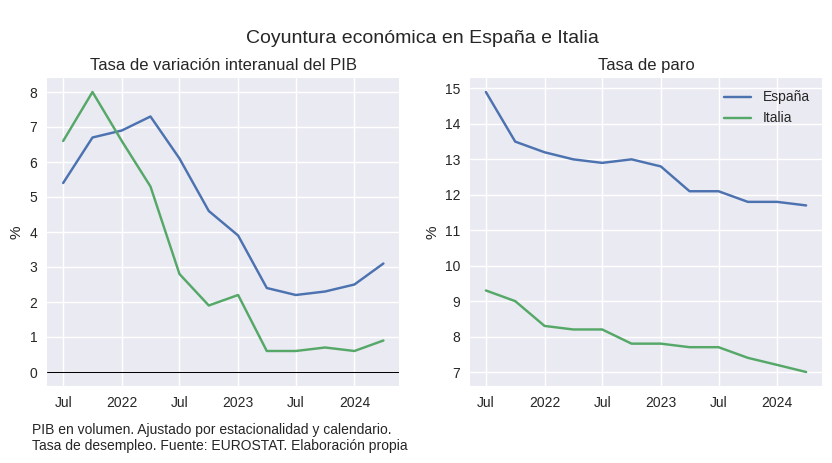

In [16]:
# Alternativa 2: Establecemos la frecuencia en la que deben aparecer las etiquetas y su formato.

import matplotlib.dates as mdates # Importamos primero esta función necesaria

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,4),dpi=100)
# Axes ax1
ax1.plot(pib['ES'],label="España")
ax1.plot(pib['IT'],label="Italia")
ax1.set_ylabel("%")
ax1.axhline(y=0, linewidth=0.75, color="black")
ax1.set_title("Tasa de variación interanual del PIB")
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))  # Frecuencia etiquetas: cada seis meses
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))  # Formato etiquetas
# Axes ax2
ax2.plot(tp['ES'],label="España")
ax2.plot(tp['IT'],label="Italia")
ax2.set_ylabel("%")
ax2.set_title("Tasa de paro")
ax2.set_xlabel("")
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))  # Frecuencia etiquetas: cada seis meses
ax2.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))  # Formato etiquetas
ax2.legend()
# Toda la figura
fig.suptitle("\nCoyuntura económica en España e Italia\n", size=14, y=1.05)  # el argumento "y" es la coordenada y donde debe aparecer el titulo.
fig.text(0.11,-0.05,"PIB en volumen. Ajustado por estacionalidad y calendario.\nTasa de desempleo. Fuente: EUROSTAT. Elaboración propia", ha="left",fontsize=10 ) # ha=horizontalalignment
plt.show()

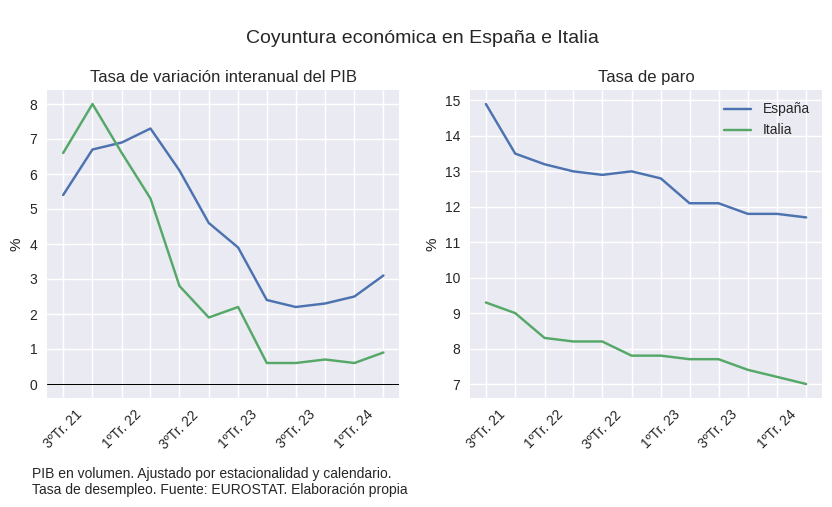

In [17]:
# Alternativa 3: Manualmente (combinada con rotación)

# Primero se crea la columna
pib["años"]=pib.index.astype(str).str[2:4]
pib["meses"]=pib.index.astype(str).str[5:7]
pib["ejex_etiq"]=""
pib.loc[(pib['meses']=="01"), "ejex_etiq"]="1ºTr. "+pib["años"]
pib.loc[(pib['meses']=="07"), "ejex_etiq"]="3ºTr. "+pib["años"]

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,4),dpi=100)
# Axes ax1
ax1.plot(pib['ES'],label="España")
ax1.plot(pib['IT'],label="Italia")
ax1.set_ylabel("%")
ax1.axhline(y=0, linewidth=0.75, color="black")
ax1.set_title("Tasa de variación interanual del PIB")
ax1.set_xticks(pib.index) # Valores a los que se aplican las etiquetas
ax1.set_xticklabels(pib["ejex_etiq"], rotation=45)   # Etiquetas a usar + rotación
# Axes ax2
ax2.plot(tp['ES'],label="España")
ax2.plot(tp['IT'],label="Italia")
ax2.set_ylabel("%")
ax2.set_title("Tasa de paro")
ax2.set_xlabel("")
ax2.set_xticks(pib.index)  # Como las fechas son las mismas, se puede usar la misma serie creada
ax2.set_xticklabels(pib["ejex_etiq"], rotation=45)  # Etiquetas a usar + rotación
ax2.legend()
# Toda la figura
fig.suptitle("\nCoyuntura económica en España e Italia\n", size=14, y=1.08)  # el argumento "y" es la coordenada y donde debe aparecer el titulo.
fig.text(0.11,-0.13,"PIB en volumen. Ajustado por estacionalidad y calendario.\nTasa de desempleo. Fuente: EUROSTAT. Elaboración propia", ha="left",fontsize=10 ) # ha=horizontalalignment
plt.show()

### 6. Gráficos avanzados:

#### Figura 5: Figura de cuatro gráficos

<ipython-input-18-57d38b35d529>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(pib.index.strftime('%Y-%m'), rotation=45) # Esta línea es para rotar las etiquetas del eje x.
<ipython-input-18-57d38b35d529>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(pib.index.strftime('%Y-%m'), rotation=45) # Esta línea es para rotar las etiquetas del eje x.


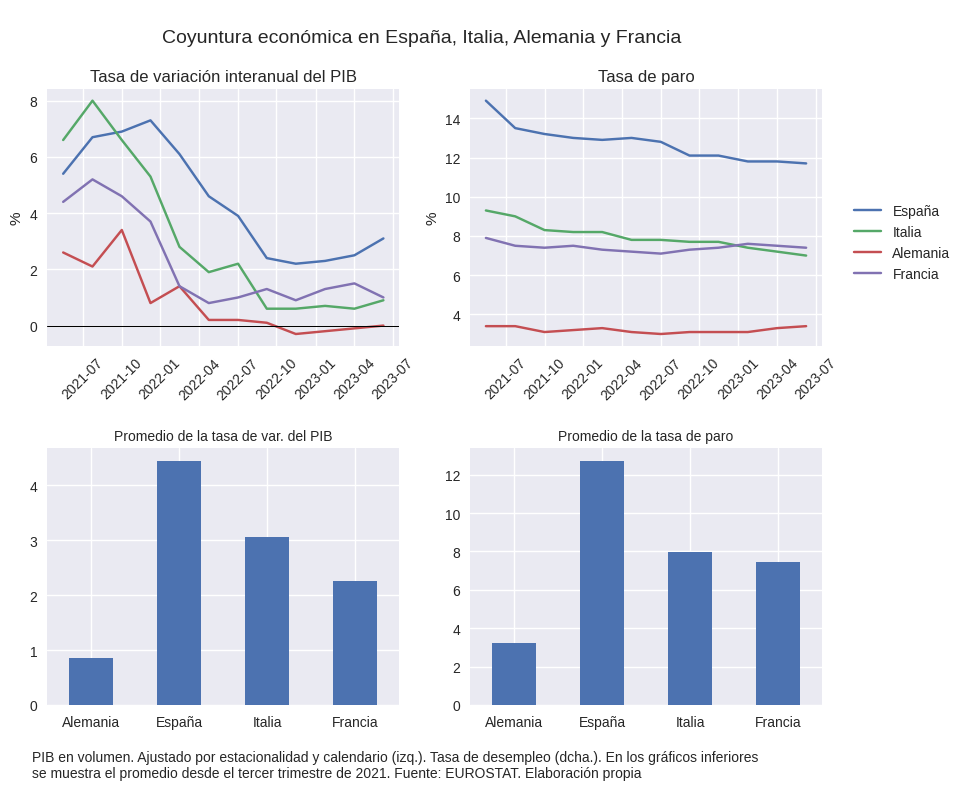

In [18]:
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,8),dpi=100)
# Axes ax1
ax1.plot(pib['ES'],label="España")
ax1.plot(pib['IT'],label="Italia")
ax1.plot(pib['DE'],label="Alemania")
ax1.plot(pib['FR'],label="Francia")
ax1.set_ylabel("%")
ax1.axhline(y=0, linewidth=0.75, color="black")
ax1.set_title("Tasa de variación interanual del PIB")
ax1.set_xticklabels(pib.index.strftime('%Y-%m'), rotation=45) # Esta línea es para rotar las etiquetas del eje x.
# Axes ax2
ax2.plot(tp['ES'],label="España")
ax2.plot(tp['IT'],label="Italia")
ax2.plot(tp['DE'],label="Alemania")
ax2.plot(tp['FR'],label="Francia")
ax2.set_ylabel("%")
ax2.set_title("Tasa de paro")
ax2.set_xlabel("")
ax2.legend(bbox_to_anchor=(1.4,0.6))
ax2.set_xticklabels(pib.index.strftime('%Y-%m'), rotation=45) # Esta línea es para rotar las etiquetas del eje x.
# Axes ax3
pib_med[paises].plot.bar(xlabel="", ax=ax3)
ax3.set_xticks([0,1,2,3])
ax3.set_xticklabels(["Alemania", "España","Italia","Francia"], rotation='horizontal')
ax3.set_title("Promedio de la tasa de var. del PIB", size=10)
# Axes ax3
tp_med[paises].plot.bar(xlabel="", ax=ax4)
ax4.set_xticks([0,1,2,3])
ax4.set_xticklabels(["Alemania", "España","Italia","Francia"], rotation='horizontal')
ax4.set_title("Promedio de la tasa de paro", size=10)
# Toda la figura
plt.subplots_adjust(hspace=0.4)
fig.suptitle("\nCoyuntura económica en España, Italia, Alemania y Francia", size=14)
fig.text(0.11,0.02,"PIB en volumen. Ajustado por estacionalidad y calendario (izq.). Tasa de desempleo (dcha.). En los gráficos inferiores\n\
se muestra el promedio desde el tercer trimestre de 2021. Fuente: EUROSTAT. Elaboración propia", ha="left",fontsize=10 ) # ha=horizontalalignment
plt.show()

#### Figura 6: Figura de 20 gráficos.

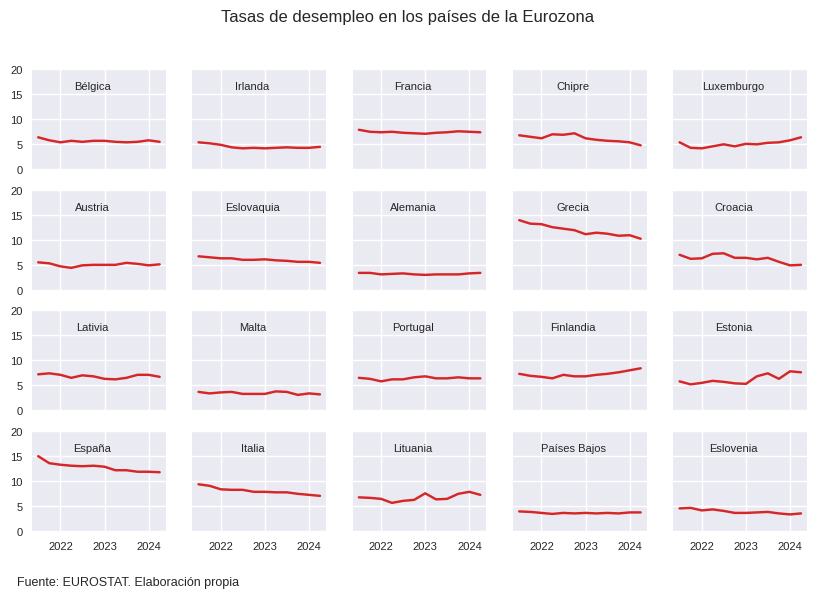

In [19]:
# Primero, creamos la lista de países de la eurozona
#https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Euro_area_enlargements
euro={"BE":"Bélgica", "IE":"Irlanda", "FR":"Francia", "CY":"Chipre", "LU":"Luxemburgo", "AT":"Austria",
      "SK":"Eslovaquia", "DE":"Alemania", "EL":"Grecia", "HR":"Croacia", "LV":"Lativia", "MT":"Malta",
      "PT":"Portugal", "FI":"Finlandia", "EE":"Estonia", "ES":"España", "IT":"Italia", "LT":"Lituania",
      "NL":"Países Bajos", "SI":"Eslovenia"}

import matplotlib.dates as mdates # importo esta función que necesito

# Creamos la figura
fig,ax=plt.subplots(4,5,figsize=(10,6),dpi=100,sharex=True,sharey=True)
for g,p in zip(fig.axes,euro.keys()):
  g.plot(tp[p],color="tab:red")
  g.set_ylim(0,20)
  g.text(0.45,0.8,euro[p],transform=g.transAxes, size=8, horizontalalignment="center")
  g.tick_params(axis='both', which='major', labelsize=8)
  g.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, )))
  g.xaxis.set_major_formatter(mdates.ConciseDateFormatter(g.xaxis.get_major_locator()))
fig.suptitle("Tasas de desempleo en los países de la Eurozona")
fig.text(0.11,0.02,"Fuente: EUROSTAT. Elaboración propia", size=9)
plt.show()

#### Figura 7: Añadiendo tablas a los gráficos.

La inclusión de tablas en los informes y en las propias figuras es muy útil, pues proporciona al lector el dato exacto, que no suele ser posible observarlo directamente en el gráfico. A continuación vamos a usar una librería que permite incluir tablas en una figura, como si fuera un gráfico (axes) más.  
  
Como ejemplo, vamos a repetir la Figura 4 añadiendo una tabla a la derecha donde se muestren los datos de PIB y paro de los últimos 6 trimestres.

In [20]:
# Instalamos e importamos el módulo necesario
!pip install plottable  # https://pypi.org/project/plottable/
from plottable import Table

In [21]:
# CREAMOS LA TABLA DE PIB

# 1. Seleccionamos datos necesarios
paises=['DE','ES','IT','FR']
pib2=pib.loc["2023":,paises]

# 2. Creamos la columna de periodos
pib2["año"]=pib2.index.astype(str).str[2:4]
pib2["meses"]=pib2.index.astype(str).str[5:7]
pib2["Trim"]=""
pib2.loc[(pib2['meses']=="01"), "Trim"]="1ºTr."+pib2["año"]
pib2.loc[(pib2['meses']=="04"), "Trim"]="2ºTr."+pib2["año"]
pib2.loc[(pib2['meses']=="07"), "Trim"]="3ºTr."+pib2["año"]
pib2.loc[(pib2['meses']=="10"), "Trim"]="4ºTr."+pib2["año"]

# 3. Establecemos la nueva columna como index
pib2.set_index(pib2['Trim'], drop=True, inplace=True)
pib2.index.name = " " # Para que luego no se vea nada.

# 4. Cambiamos el nombre a las columnas
for p in paises:
  pib2.rename(columns={p:euro[p]}, inplace=True)

# 5. Borramos las columnas innecesarias:
pib2.drop(columns=['año', 'meses', 'Trim'], inplace=True)

# 6. Transponemos la tabla
pib2=pib2.T
pib2.index.name = " " # Para que luego no se vea nada.


In [22]:
# CREAMOS LA TABLA DE TASA DE PARO

# ¡ES TODO IGUAL! Solo hay que reemplazar "pib" por "tp"

# 1. Seleccionamos datos necesarios
paises=['DE','ES','IT','FR']
tp2=tp.loc["2023":,paises]

# 2. Creamos la columna de periodos
tp2["año"]=tp2.index.astype(str).str[2:4]
tp2["meses"]=tp2.index.astype(str).str[5:7]
tp2["Trim"]=""
tp2.loc[(tp2['meses']=="01"), "Trim"]="1ºTr."+tp2["año"]
tp2.loc[(tp2['meses']=="04"), "Trim"]="2ºTr."+tp2["año"]
tp2.loc[(tp2['meses']=="07"), "Trim"]="3ºTr."+tp2["año"]
tp2.loc[(tp2['meses']=="10"), "Trim"]="4ºTr."+tp2["año"]

# 3. Establecemos la nueva columna como index
tp2.set_index(tp2['Trim'], drop=True, inplace=True)

# 4. Cambiamos el nombre a las columnas
for p in paises:
  tp2.rename(columns={p:euro[p]}, inplace=True)

# 5. Borramos las columnas innecesarias:
tp2.drop(columns=['año', 'meses', 'Trim'], inplace=True)

# 6. Transponemos la tabla
tp2=tp2.T
tp2.index.name = " " # Para que luego no se vea nada.

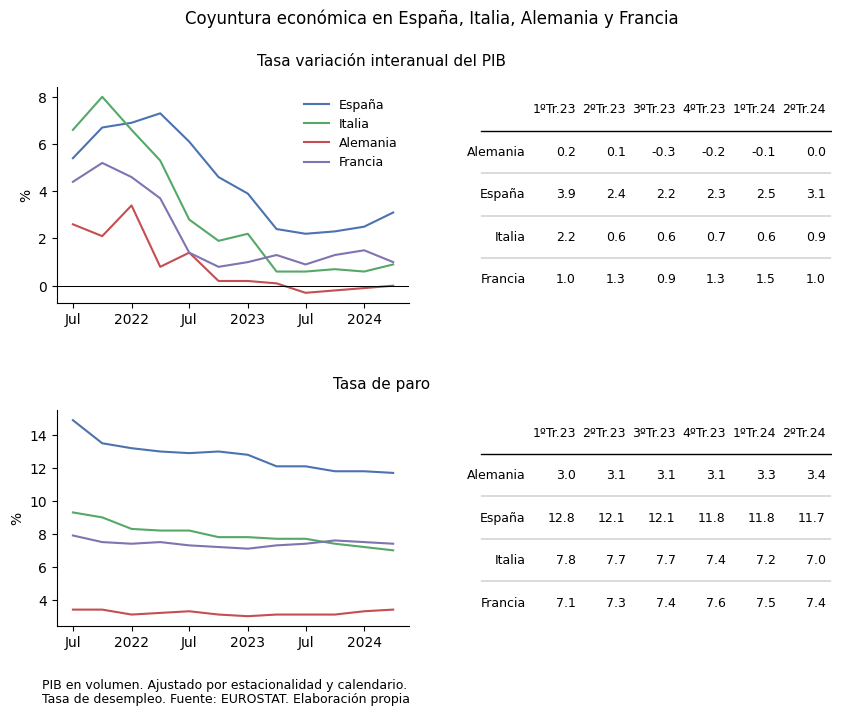

In [23]:
plt.style.use('default')
plt.style.use('seaborn-v0_8-deep')

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,7),dpi=100)
# Axes ax1: Gráfico PIB
ax1.plot(pib['ES'],label="España")
ax1.plot(pib['IT'],label="Italia")
ax1.plot(pib['DE'],label="Alemania")
ax1.plot(pib['FR'],label="Francia")
ax1.set_ylabel("%")
ax1.axhline(y=0, linewidth=0.75, color="black")
ax1.legend(frameon=False, fontsize =9)
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))  # Frecuencia etiquetas: cada seis meses
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))  # Formato etiquetas
ax1.spines[['right', 'top']].set_visible(False) # Elimina el border superior y derecho del gráfico
# Axes ax3: Gráfico Paro
ax3.plot(tp['ES'],label="España")
ax3.plot(tp['IT'],label="Italia")
ax3.plot(tp['DE'],label="Alemania")
ax3.plot(tp['FR'],label="Francia")
ax3.set_ylabel("%")
ax3.set_xlabel("")
ax3.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))  # Frecuencia etiquetas: cada seis meses
ax3.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))  # Formato etiquetas
ax3.spines[['right', 'top']].set_visible(False) # Elimina el border superior y derecho del gráfico
# Axes ax2: Tabla PIB
Table(pib2,ax=ax2,textprops={"size":9})
# Axes ax4: Tabla Paro
Table(tp2,ax=ax4,textprops={"size":9})
# Toda la figura
plt.subplots_adjust(hspace=0.5)
fig.text(0.5,0.97,"Coyuntura económica en España, Italia, Alemania y Francia", size=12, ha="center")
fig.text(0.45,0.91,"Tasa variación interanual del PIB", size=11, ha="center")
fig.text(0.45,0.45,"Tasa de paro", size=11, ha="center")
fig.text(0.11,0,"PIB en volumen. Ajustado por estacionalidad y calendario.\nTasa de desempleo. Fuente: EUROSTAT. Elaboración propia",
         ha="left",fontsize=9) # ha=horizontalalignment
plt.show()

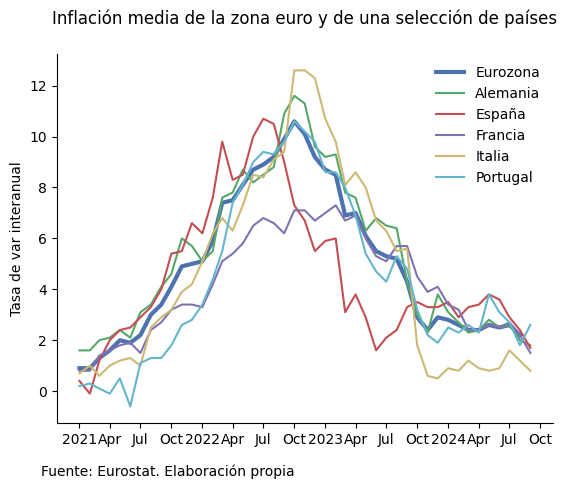

In [50]:
# ESTE CÓDIGO GENERA AUTOMÁTICAMENTE UN GRÁFICO DE INFLACIÓN DE LOS ÚLTIMOS 24 MESES
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

link_ipc="https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/prc_hicp_manr?format=TSV&compressed=true"

ipc = pd.read_csv(link_ipc, compression='gzip', header=0, sep='\t')
ipc[['freq','unit','coicop','geo']]=ipc['freq,unit,coicop,geo\TIME_PERIOD'].str.split(",", expand=True)
ipc.drop(columns=['freq,unit,coicop,geo\TIME_PERIOD','freq'], inplace=True)

# Selecciono inflación general
ipc=ipc.loc[ipc['coicop']=="CP00"]
ipc

# Selecciono geo de interés
ipc=ipc.loc[(ipc['geo']=='EA20') |
            (ipc['geo']=='ES') |
            (ipc['geo']=='PT') |
            (ipc['geo']=='FR') |
            (ipc['geo']=='IT') |
            (ipc['geo']=='DE')]

# Borramos los valores p y los :
for col in ipc.columns:
  for c in ["e",":"," "]:
    ipc[col]=ipc[col].replace(c,"",regex=True)

# Transponemos la tabla
ipc=ipc.transpose()

# Usamos la fila de nombres de países como nombres de las columnas
nombre_col = ipc.iloc[-1] # Los nombres de países están en la última fila
ipc = ipc.iloc[:-3] # aplicamos un filtrado para quitar las tres últimas filas
ipc.columns = nombre_col # Establecemos el nuevo nombre de las columnas

# Convertimos las columnas en formato numérico.
for col in ipc.columns:
  ipc[col]=pd.to_numeric(ipc[col], errors='coerce')

# Establecemos el index de la tabla como fecha
ipc.index=ipc.index.astype("datetime64[ns]")
ipc.index=pd.to_datetime(ipc.index)
ipc.sort_index(inplace=True)

# Seleccionamos de 2021 en adelante
ipc=ipc.loc["2021":]

# Figura
fig,ax=plt.subplots()
ax.plot(ipc["EA20"], label="Eurozona",linewidth=3)
ax.plot(ipc["DE"], label="Alemania")
ax.plot(ipc["ES"], label="España")
ax.plot(ipc["FR"], label="Francia")
ax.plot(ipc["IT"], label="Italia")
ax.plot(ipc["PT"], label="Portugal")
ax.legend(frameon=False)
ax.spines[["top","right"]].set_visible(False)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,4,7,10)))
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax.set_title("Inflación media de la zona euro y de una selección de países\n")
ax.set_ylabel("Tasa de var interanual")
fig.text(0.1,0,"Fuente: Eurostat. Elaboración propia")
plt.show()

### 7. Ejercicios adicionales:

1. Crear una figura con dos gráficos (uno encima de otro) donde en el de arriba se muestre la tasa de crecimiento media del PIB para los países de la eurozona y en el de debajo se muestre la tasa de paro media para ese mismo grupo de países. Para ello, debéis primero seleccionar las columnas correspondientes a los países de la eurozona y luego calcular la media para cada periodo (*pista: usar la función ```.mean()```con el argumento ```axis=1```*).
2. Descargar los datos de inflación de EUROSTAT (tasa de var. interanual del IPC) y representarlos en una figura de un único gráfico, donde aparezcan las siguientes 6 series: la media para la zona euro (EA20), España, Francia, Italia, Alemania y Portugal. Mostrar los datos desde enero de 2021.
3. Crear una figura semejante a la figura 7, pero añadiendo una fila adicional donde se represente la inflación para esos 4 países y una tabla con los valores para los últimos seis meses. Por tanto, la dimensión de la figura debe ser 3 filas x 2 columnas.


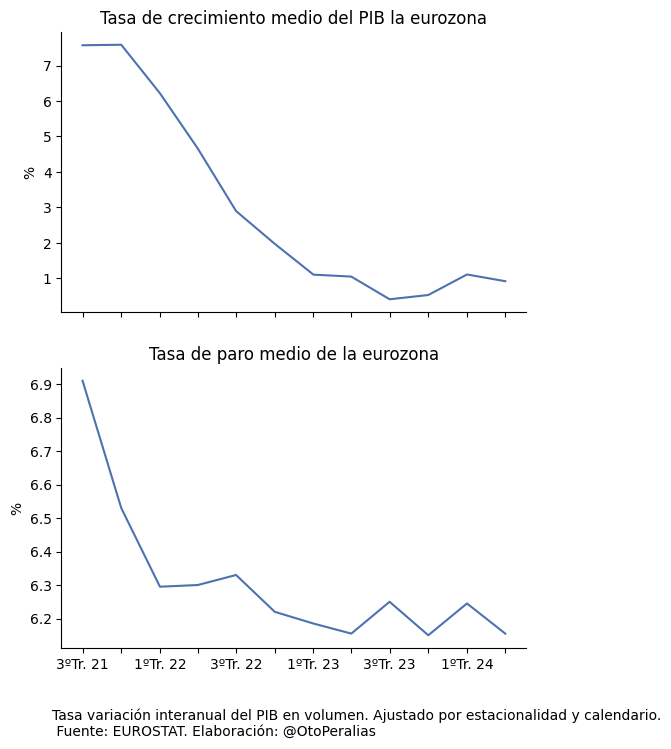

In [34]:
# Ejercicio 1
fig, (ax1,ax2)=plt.subplots(2,1,figsize=(6,8),dpi=100, sharex=True)
ax1.plot(pib[euro.keys()].mean(axis=1))
ax1.set_ylabel("%")
ax1.set_title("Tasa de crecimiento medio del PIB la eurozona")
ax1.spines[['right', 'top']].set_visible(False)
ax2.plot(tp[euro.keys()].mean(axis=1))
ax2.set_ylabel("%")
ax2.set_xlabel("")
ax2.set_title("Tasa de paro medio de la eurozona")
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_xticks(pib.index)
ax2.set_xticklabels(pib["ejex_etiq"])
fig.text(0.11,0,"Tasa variación interanual del PIB en volumen. Ajustado por estacionalidad y calendario.\n Fuente: EUROSTAT. Elaboración: @OtoPeralias", ha="left",fontsize=10 ) # ha=horizontalalignment
plt.show()



### 8. Material adicional:

Para más ejemplos de gráficos, usando otros datos, véase este notebook del curso 2022-2023:
[Visualización de datos: Creando gráficos de calidad (curso 2022-2023)](https://github.com/otoperalias/Coyuntura/blob/_2022/clases/Tema2_Visualizacion.ipynb). En particular, es muy útil aprender a crear figuras donde las dimensiones de los gráficos pueden variar, como en esta figura (Figura 6) contenida en dicho notebook:
<br />

<img src="https://github.com/otoperalias/Coyuntura/blob/main/clases/images/matplotlib_subplot2grid.jpg?raw=true" alt="drawing" width="650"/>



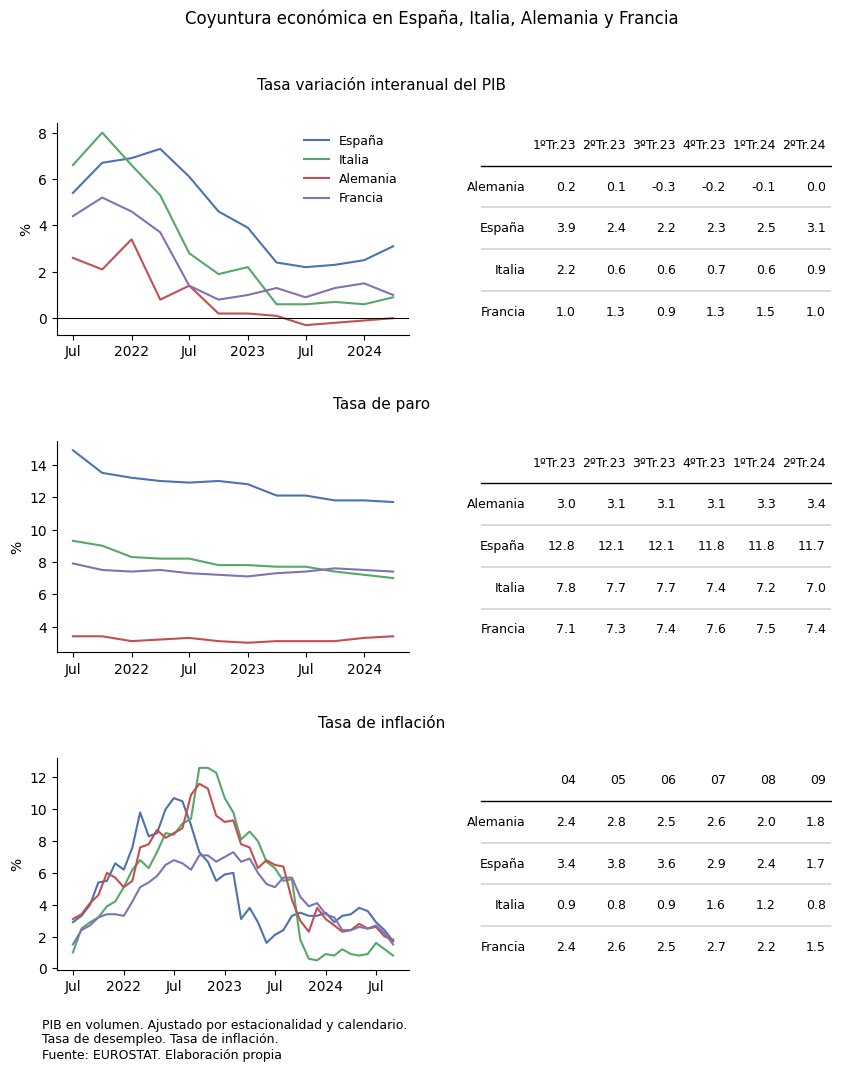

In [60]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3,2,figsize=(10,11),dpi=100)
# Axes ax1: Gráfico PIB
ax1.plot(pib['ES'],label="España")
ax1.plot(pib['IT'],label="Italia")
ax1.plot(pib['DE'],label="Alemania")
ax1.plot(pib['FR'],label="Francia")
ax1.set_ylabel("%")
ax1.axhline(y=0, linewidth=0.75, color="black")
ax1.legend(frameon=False, fontsize =9)
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))  # Frecuencia etiquetas: cada seis meses
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))  # Formato etiquetas
ax1.spines[['right', 'top']].set_visible(False) # Elimina el border superior y derecho del gráfico
# Axes ax3: Gráfico Paro
ax3.plot(tp['ES'],label="España")
ax3.plot(tp['IT'],label="Italia")
ax3.plot(tp['DE'],label="Alemania")
ax3.plot(tp['FR'],label="Francia")
ax3.set_ylabel("%")
ax3.set_xlabel("")
ax3.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))  # Frecuencia etiquetas: cada seis meses
ax3.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))  # Formato etiquetas
ax3.spines[['right', 'top']].set_visible(False) # Elimina el border superior y derecho del gráfico
# Axes ax1: Gráfico imflación
ipc=ipc.loc["2021-07":]
ax5.plot(ipc['ES'],label="España")
ax5.plot(ipc['IT'],label="Italia")
ax5.plot(ipc['DE'],label="Alemania")
ax5.plot(ipc['FR'],label="Francia")
ax5.set_ylabel("%")
ax5.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))  # Frecuencia etiquetas: cada seis meses
ax5.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))  # Formato etiquetas
ax5.spines[['right', 'top']].set_visible(False) # Elimina el border superior y derecho del gráfico
# Axes ax2: Tabla PIB
Table(pib2,ax=ax2,textprops={"size":9})
# Axes ax4: Tabla Paro
Table(tp2,ax=ax4,textprops={"size":9})
# Axes ax6: Tabla Inflación
Table(ipc2,ax=ax6,textprops={"size":9})
# Toda la figura
plt.subplots_adjust(hspace=0.5)
fig.text(0.5,0.97,"Coyuntura económica en España, Italia, Alemania y Francia", size=12, ha="center")
fig.text(0.45,0.91,"Tasa variación interanual del PIB", size=11, ha="center")
fig.text(0.45,0.62,"Tasa de paro", size=11, ha="center")
fig.text(0.45,0.33,"Tasa de inflación", size=11, ha="center")
fig.text(0.11,0.03,"PIB en volumen. Ajustado por estacionalidad y calendario.\nTasa de desempleo. Tasa de inflación.\nFuente: EUROSTAT. Elaboración propia",
         ha="left",fontsize=9) # ha=horizontalalignment
plt.show()

In [56]:
# CREAMOS LA TABLA DE LA INFLACIÓN

# 1. Seleccionamos datos necesarios
paises=['DE','ES','IT','FR']
ipc2=ipc.loc["2024-04":,paises]

# 2. Creamos la columna de periodos
ipc2["meses"]=ipc2.index.astype(str).str[5:7]

# 3. Establecemos la nueva columna como index
ipc2.set_index(ipc2['meses'], drop=True, inplace=True)
ipc2.index.name = " " # Para que luego no se vea nada.

# 4. Cambiamos el nombre a las columnas
for p in paises:
  ipc2.rename(columns={p:euro[p]}, inplace=True)

# 5. Borramos las columnas innecesarias:
ipc2.drop(columns=['meses',], inplace=True)

# 6. Transponemos la tabla
ipc2=ipc2.T
ipc2.index.name = " " # Para que luego no se vea nada.
ipc2

,04,05,06,07,08,09
,,,,,,
Alemania,2.4,2.8,2.5,2.6,2.0,1.8
España,3.4,3.8,3.6,2.9,2.4,1.7
Italia,0.9,0.8,0.9,1.6,1.2,0.8
Francia,2.4,2.6,2.5,2.7,2.2,1.5
